In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

df = pd.read_csv('Housing .csv',lineterminator='\n')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus\r
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished\r
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished\r
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished\r
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished\r
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished\r


In [5]:
df.isnull().sum()

price                 0
area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad              0
guestroom             0
basement              0
hotwaterheating       0
airconditioning       0
parking               0
prefarea              0
furnishingstatus\r    0
dtype: int64

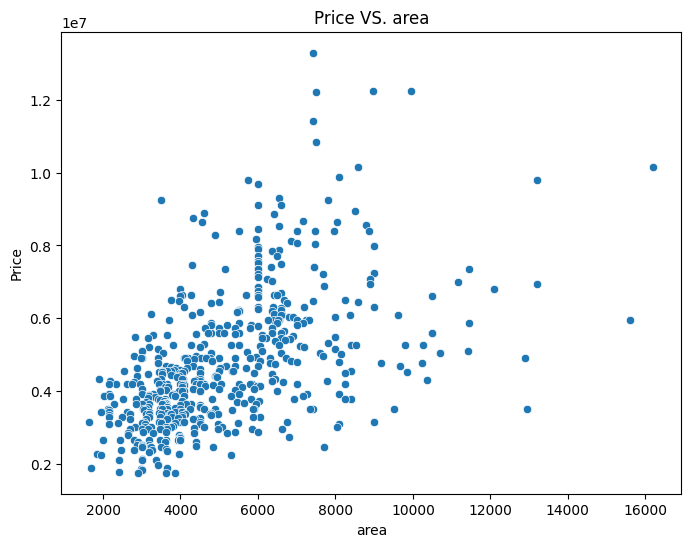

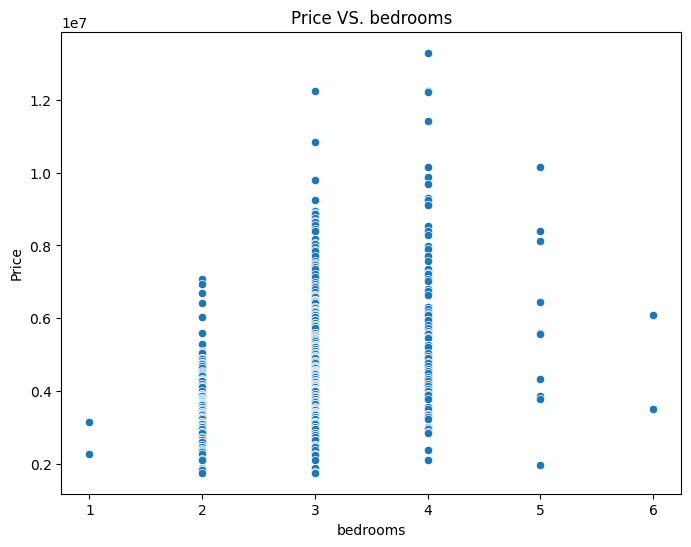

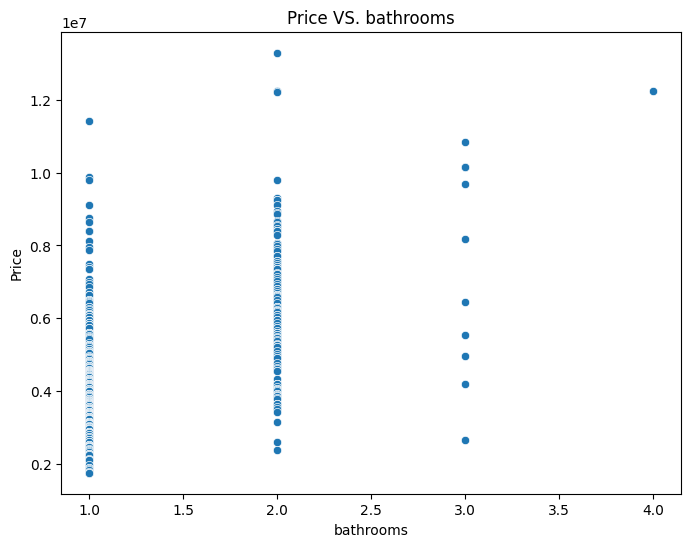

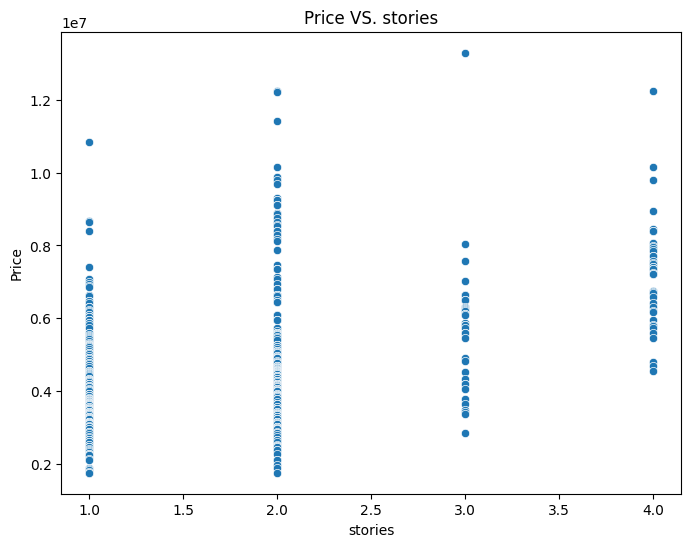

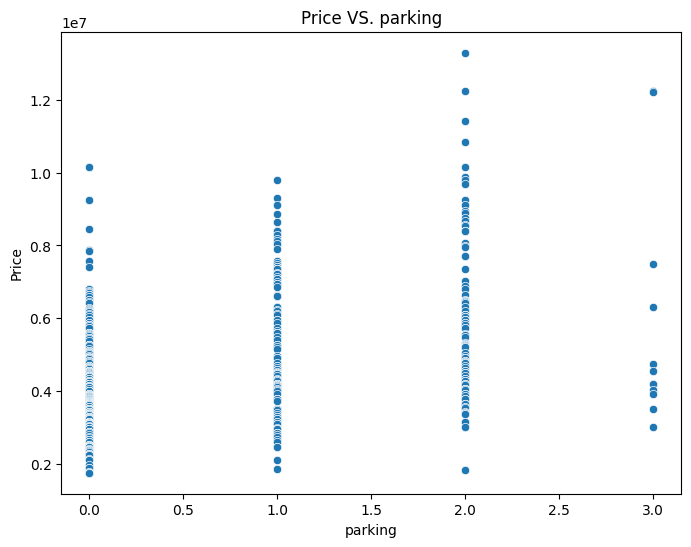

In [6]:
for feature in ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='price', data=df)
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f'Price VS. {feature}')
    plt.show()

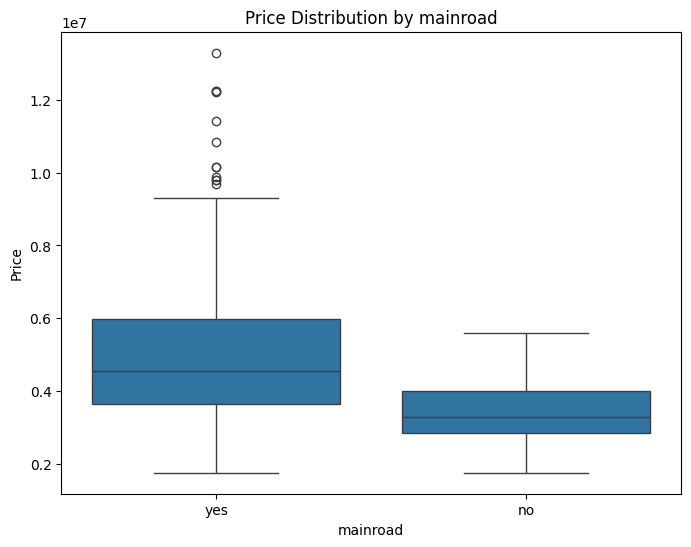

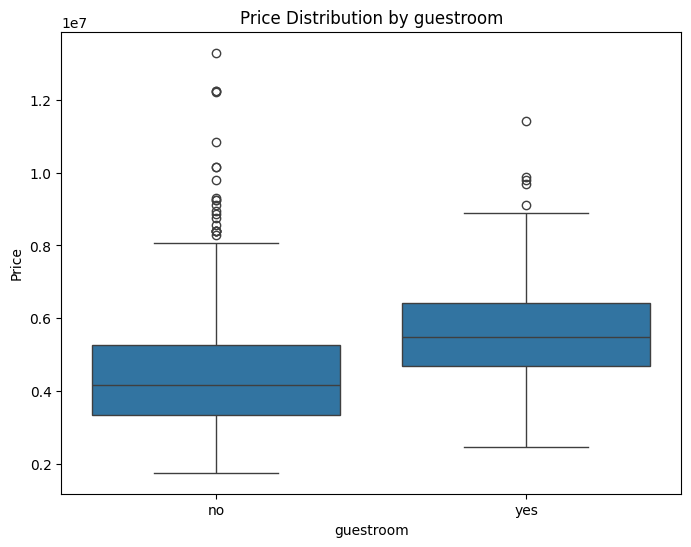

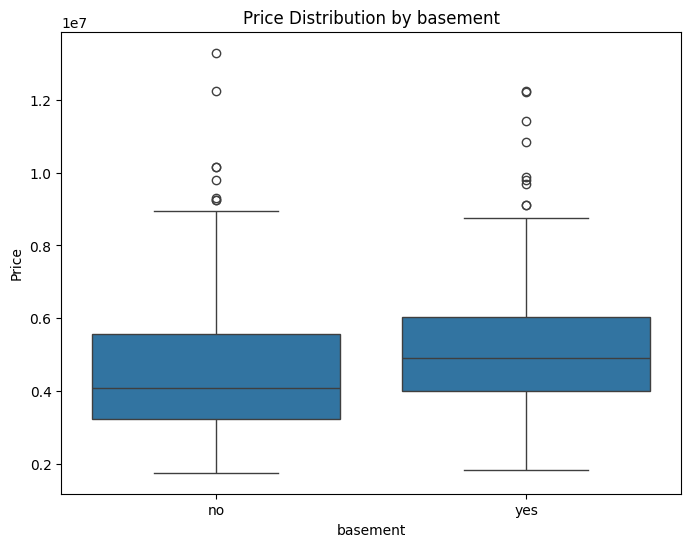

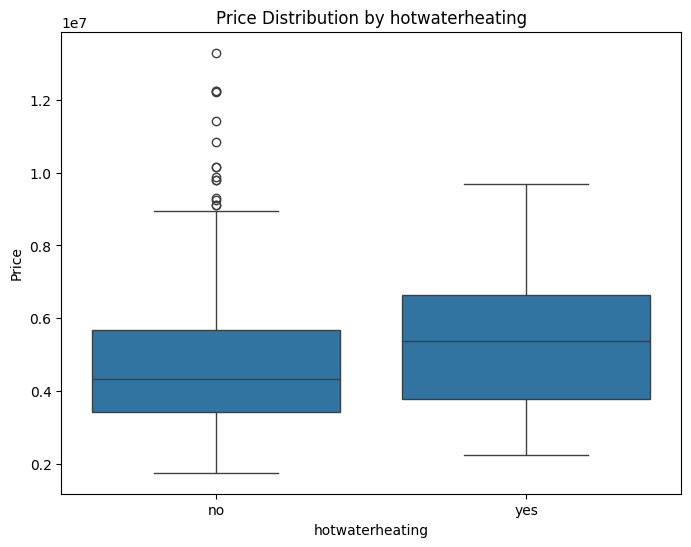

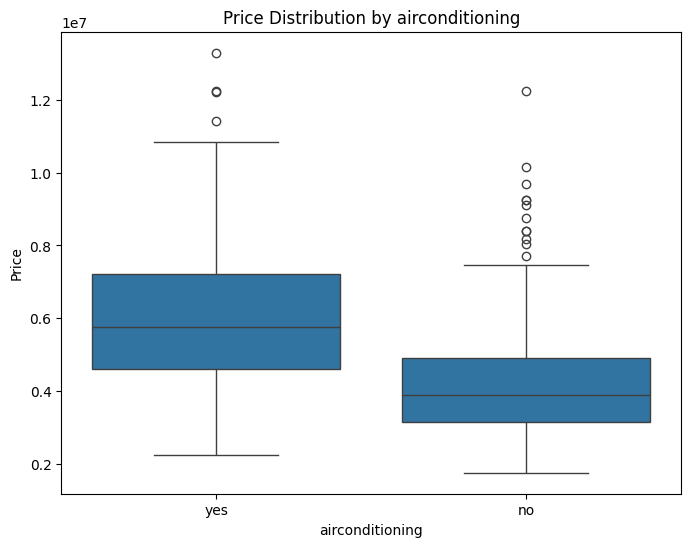

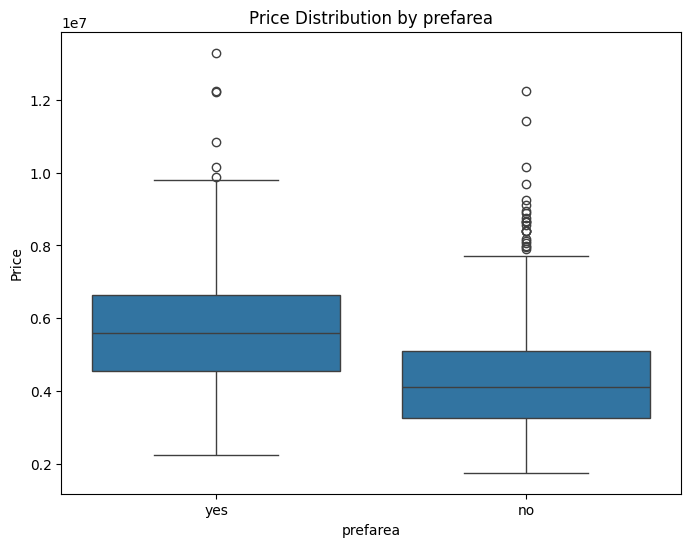

In [7]:
for feature in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, y='price', data=df)
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f'Price Distribution by {feature}')
    plt.show()

In [8]:
df = pd.get_dummies(df,columns =['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea','furnishingstatus\r'],drop_first =True)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus\r_semi-furnished\r,furnishingstatus\r_unfurnished\r
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [11]:
correlation_matrix=df.corr()
correlation_matrix

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus\r_semi-furnished\r,furnishingstatus\r_unfurnished\r
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


) missing from font(s) DejaVu Sans.orn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from font(s) DejaVu Sans.hon\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


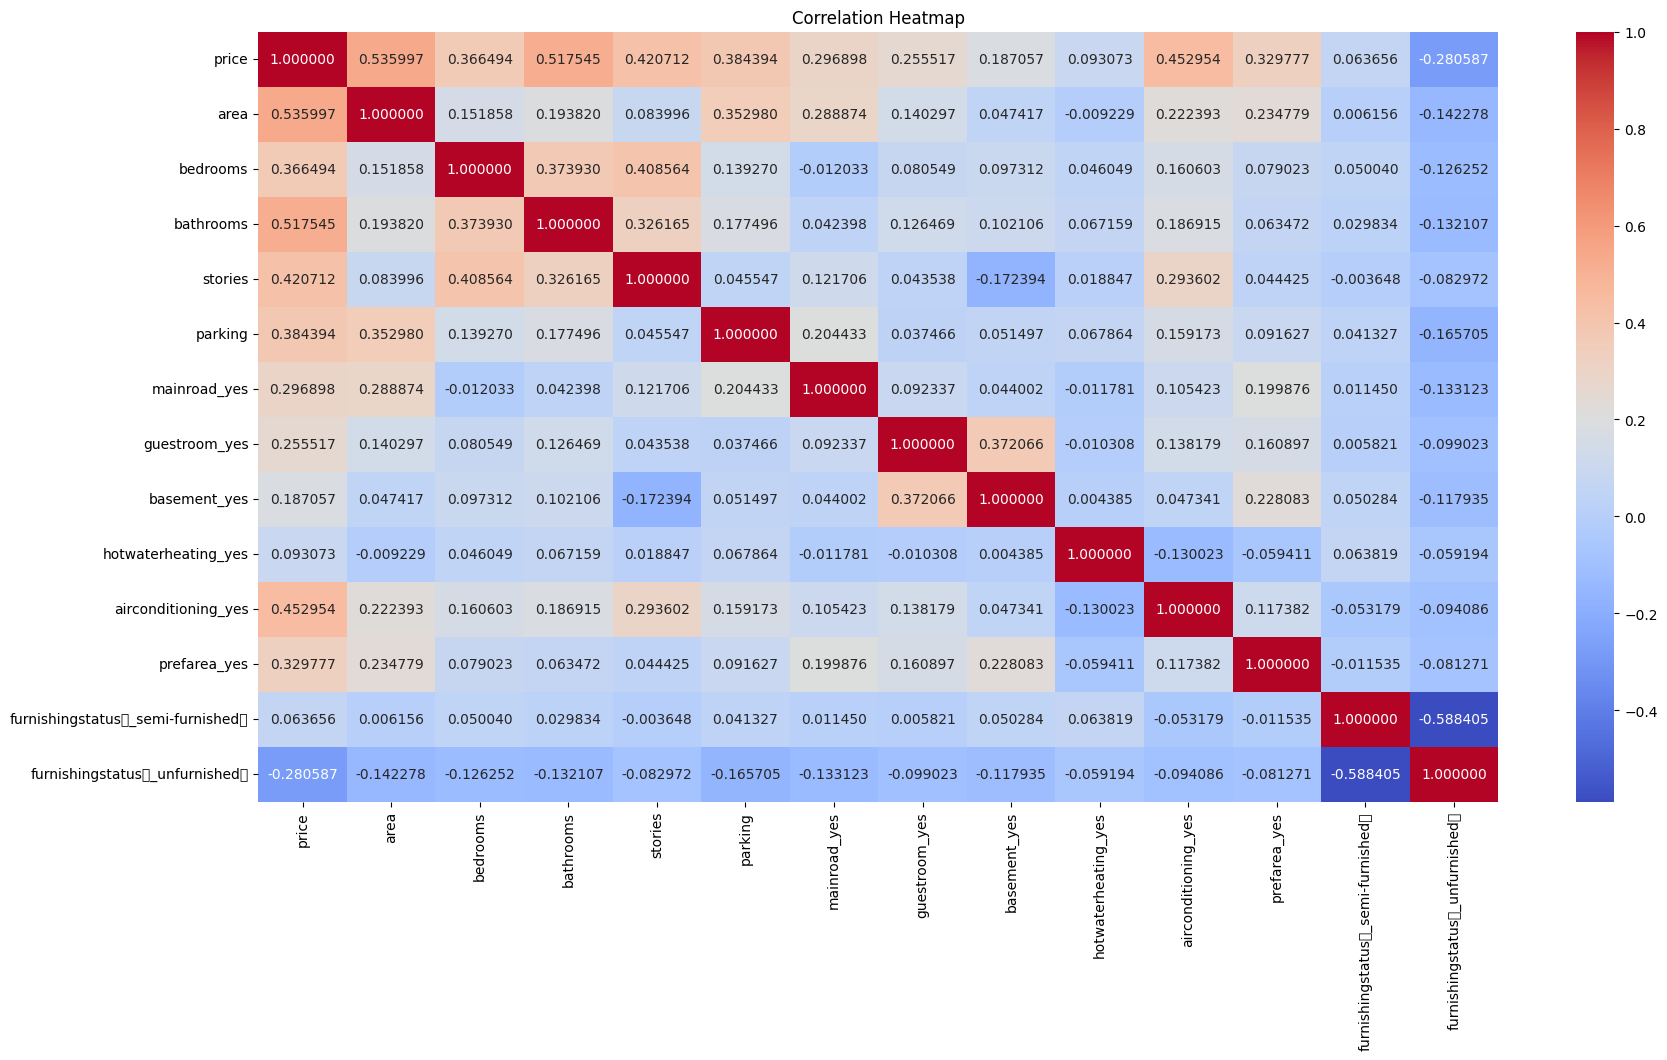

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True ,cmap ='coolwarm',fmt ='2f')
plt.title('Correlation Heatmap')
plt.show()